       Enable intellisence

In [1]:
%config IPCompleter.greedy=True

    initialise sparkfind 

In [2]:
import findspark
findspark.init()

    init spark session and load data into a dataframe

In [3]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('ml-bank').getOrCreate()
df = spark.read.option("delimiter",";").csv('Data/bank-full.csv', header = True, inferSchema = True)
df.printSchema()

root
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- balance: integer (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- contact: string (nullable = true)
 |-- day: integer (nullable = true)
 |-- month: string (nullable = true)
 |-- duration: integer (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- y: string (nullable = true)



    use pandas to display the data frame as it is well formatted than the dataframe show() method

In [4]:
import pandas as pd
pd.DataFrame(df.take(5), columns=df.columns)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


    select numric features from the spark data frame

In [5]:
numeric_features = [t[0] for t in df.dtypes if t[1] == 'int']
df.select(numeric_features).describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
age,45211,40.93621021432837,10.618762040975401,18,95
balance,45211,1362.2720576850766,3044.7658291685243,-8019,102127
day,45211,15.80641879188693,8.322476153044589,1,31
duration,45211,258.1630797814691,257.5278122651712,0,4918
campaign,45211,2.763840658246887,3.0980208832791813,1,63
pdays,45211,40.19782796222158,100.12874599059818,-1,871
previous,45211,0.5803233726305546,2.3034410449312164,0,275


    display sumamry stat - from a panda dataframe (which includes many stat)

In [6]:
df_pandas = df.toPandas()
df_pandas.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


    find null count for each column

In [7]:
df_pandas.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

    frequncy table for categorical variables

In [8]:
all_columns = df_pandas.columns
numeric_columns = df_pandas._get_numeric_data().columns
categorical_columns = list(set(all_columns) - set(numeric_columns))

for col in categorical_columns:
    print(df_pandas[col].value_counts())
    print("\n================================================\n")


cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64


no     37967
yes     7244
Name: loan, dtype: int64


yes    25130
no     20081
Name: housing, dtype: int64


secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64


blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64


married     27214
single      12790
divorced     5207
Name: marital, dtype: int64


may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64


unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64


no     39922
yes     5289
Name: y, dtyp

    correlation between numeric independant variables

            scatter plot

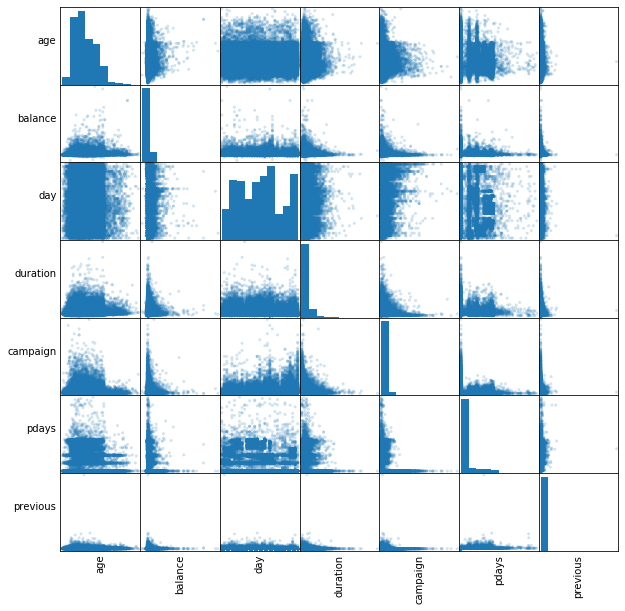

In [9]:
numeric_data = df.select(numeric_features).toPandas()
axs = pd.plotting.scatter_matrix(numeric_data, alpha=0.2, figsize=(10, 10))
n = len(numeric_data.columns)
for i in range(n):
    v = axs[i, 0]
    v.yaxis.label.set_rotation(0)
    v.yaxis.label.set_ha('right')
    v.set_yticks(())
    h = axs[n-1, i]
    h.xaxis.label.set_rotation(90)
    h.set_xticks(())

        correlation matrix

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


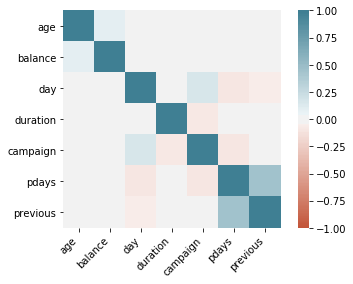

In [10]:
import seaborn as sns
corr = numeric_data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

corr

# data preparation for machine learning

    DataFrame: Spark ML uses DataFrame from Spark SQL as an ML dataset, which can hold a variety of data types. E.g., a DataFrame could have different columns storing text, feature vectors, true labels, and predictions.

    Transformer: A Transformer is an algorithm which can transform one DataFrame into another DataFrame. E.g., an ML model is a Transformer which transforms DataFrame with features into a DataFrame with predictions.

    Estimator: An Estimator is an algorithm which can be fit on a DataFrame to produce a Transformer. E.g., a learning algorithm is an Estimator which trains on a DataFrame and produces a model.

    Pipeline: A Pipeline chains multiple Transformers and Estimators together to specify an ML workflow.
    
    Transformer always returns a dataframe where as estimator always return a model which can apply on a dataframe

    #code to convert categorical variables to numeric variables
    
    from pyspark.ml.feature import OneHotEncoder,StringIndexer

    stringIndexer = StringIndexer(inputCol = 'marital', outputCol = ' maritalIndex')
    df_stringindexer = stringIndexer.fit(df).transform(df)
    encoder = OneHotEncoder(inputCol=stringIndexer.getOutputCol(), outputCol="JobclassVec")
    df_encoder = encoder.fit(d).transform(d).toPandas()
    print(df_encoder)
    
    # code to create a vector assemble
    from pyspark.ml.feature import VectorAssembler
    print(df.take(5))
    assemblerInputs = ['age', 'balance', 'duration']
    assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")
    output = assembler.transform(df)
    print(output.take(5))

In [11]:
from pyspark.ml.feature import OneHotEncoder,StringIndexer, VectorAssembler
print(df.take(5))
assemblerInputs = ['age', 'balance', 'duration']
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")
output = assembler.transform(df)
print(output.take(5))

[Row(age=58, job='management', marital='married', education='tertiary', default='no', balance=2143, housing='yes', loan='no', contact='unknown', day=5, month='may', duration=261, campaign=1, pdays=-1, previous=0, poutcome='unknown', y='no'), Row(age=44, job='technician', marital='single', education='secondary', default='no', balance=29, housing='yes', loan='no', contact='unknown', day=5, month='may', duration=151, campaign=1, pdays=-1, previous=0, poutcome='unknown', y='no'), Row(age=33, job='entrepreneur', marital='married', education='secondary', default='no', balance=2, housing='yes', loan='yes', contact='unknown', day=5, month='may', duration=76, campaign=1, pdays=-1, previous=0, poutcome='unknown', y='no'), Row(age=47, job='blue-collar', marital='married', education='unknown', default='no', balance=1506, housing='yes', loan='no', contact='unknown', day=5, month='may', duration=92, campaign=1, pdays=-1, previous=0, poutcome='unknown', y='no'), Row(age=33, job='unknown', marital='si

In [12]:
df = df.select('age', 'job', 'marital','month','day', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y')
cols = df.columns

In [13]:
from pyspark.ml.feature import OneHotEncoder,StringIndexer, VectorAssembler


try:
    categorical_columns.remove('y')
    categoricalColumns = categorical_columns
except ValueError:
    categoricalColumns = categorical_columns

stages = []
for categoricalCol in categoricalColumns:
    stringIndexer = StringIndexer(inputCol = categoricalCol, outputCol = categoricalCol + 'Index')
    encoder = OneHotEncoder(inputCols=[stringIndexer.getOutputCol()], outputCols=[categoricalCol + "classVec"])
    stages += [stringIndexer, encoder]
label_stringIdx = StringIndexer(inputCol = 'y', outputCol = 'label')
stages += [label_stringIdx]
numericCols = list(numeric_columns) # use list as the values are in a Index
assemblerInputs = [c + "classVec" for c in categoricalColumns] + numericCols
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")
stages += [assembler]
print(categoricalColumns)


['contact', 'loan', 'housing', 'education', 'job', 'marital', 'month', 'poutcome', 'default']


    create pipeline  - combining tranformation and estimoators to gether

In [14]:
from pyspark.ml import Pipeline
pipeline = Pipeline(stages = stages)
pipelineModel = pipeline.fit(df)
df = pipelineModel.transform(df)
selectedCols = ['label', 'features']# + cols
df = df.select(selectedCols)
df.printSchema()
df.show()

root
 |-- label: double (nullable = false)
 |-- features: vector (nullable = true)

+-----+--------------------+
|label|            features|
+-----+--------------------+
|  0.0|(42,[1,2,3,5,8,18...|
|  0.0|(42,[1,2,3,4,9,19...|
|  0.0|(42,[1,3,4,14,18,...|
|  0.0|(42,[1,2,3,7,18,2...|
|  0.0|(42,[1,2,19,20,31...|
|  0.0|(42,[1,2,3,5,8,18...|
|  0.0|(42,[1,3,5,8,19,2...|
|  0.0|(42,[1,2,3,5,14,2...|
|  0.0|(42,[1,2,3,6,12,1...|
|  0.0|(42,[1,2,3,4,9,19...|
|  0.0|(42,[1,2,3,4,10,2...|
|  0.0|(42,[1,2,3,4,10,1...|
|  0.0|(42,[1,2,3,4,9,18...|
|  0.0|(42,[1,2,3,9,18,2...|
|  0.0|(42,[1,2,3,4,11,1...|
|  0.0|(42,[1,2,3,6,12,1...|
|  0.0|(42,[1,2,3,10,19,...|
|  0.0|(42,[1,2,3,6,7,18...|
|  0.0|(42,[1,2,3,6,12,1...|
|  0.0|(42,[1,2,3,4,11,1...|
+-----+--------------------+
only showing top 20 rows



In [15]:
df.take(5)

[Row(label=0.0, features=SparseVector(42, {1: 1.0, 2: 1.0, 3: 1.0, 5: 1.0, 8: 1.0, 18: 1.0, 20: 1.0, 31: 1.0, 34: 1.0, 35: 58.0, 36: 2143.0, 37: 5.0, 38: 261.0, 39: 1.0, 40: -1.0})),
 Row(label=0.0, features=SparseVector(42, {1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 9: 1.0, 19: 1.0, 20: 1.0, 31: 1.0, 34: 1.0, 35: 44.0, 36: 29.0, 37: 5.0, 38: 151.0, 39: 1.0, 40: -1.0})),
 Row(label=0.0, features=SparseVector(42, {1: 1.0, 3: 1.0, 4: 1.0, 14: 1.0, 18: 1.0, 20: 1.0, 31: 1.0, 34: 1.0, 35: 33.0, 36: 2.0, 37: 5.0, 38: 76.0, 39: 1.0, 40: -1.0})),
 Row(label=0.0, features=SparseVector(42, {1: 1.0, 2: 1.0, 3: 1.0, 7: 1.0, 18: 1.0, 20: 1.0, 31: 1.0, 34: 1.0, 35: 47.0, 36: 1506.0, 37: 5.0, 38: 92.0, 39: 1.0, 40: -1.0})),
 Row(label=0.0, features=SparseVector(42, {1: 1.0, 2: 1.0, 19: 1.0, 20: 1.0, 31: 1.0, 34: 1.0, 35: 33.0, 36: 1.0, 37: 5.0, 38: 198.0, 39: 1.0, 40: -1.0}))]

In [16]:
pd.DataFrame(df.take(5), columns=df.columns).transpose()

,0,1,2,3,4
label,0,0,0,0,0
features,"(0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, ...","(0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...","(0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [17]:
train, test = df.randomSplit([0.7, 0.3], seed = 2018)
print("Training Dataset Count: " + str(train.count()))
print("Test Dataset Count: " + str(test.count()))

Training Dataset Count: 31685
Test Dataset Count: 13526


In [18]:
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(featuresCol = 'features', labelCol = 'label', maxIter=100)
lrModel = lr.fit(train)

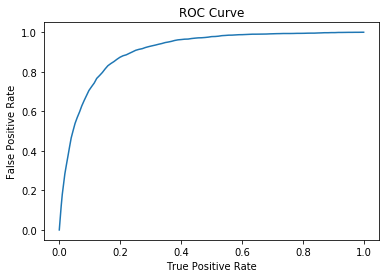

Training set areaUnderROC: 0.90657182635266


In [19]:
import matplotlib.pyplot as plt

trainingSummary = lrModel.summary
roc = trainingSummary.roc.toPandas()
plt.plot(roc['FPR'],roc['TPR'])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print('Training set areaUnderROC: ' + str(trainingSummary.areaUnderROC))